In [1]:
import pandas as pd
import pandas_datareader as pdr 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl
%matplotlib inline

In [2]:
google = pdr.get_data_yahoo('GOOG', start='7/01/2012', end='1/15/2018')
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-02,289.030151,289.616333,286.387329,288.359497,288.359497,3332400
2012-07-03,288.130981,292.303833,287.132477,292.015717,292.015717,2394400
2012-07-05,292.477722,298.091217,292.368439,296.034576,296.034576,4722100
2012-07-06,294.310791,294.842346,289.526917,291.096710,291.096710,4351600
2012-07-09,290.585022,292.398224,288.746979,291.111603,291.111603,3452500


 ## Calculate Daily Price Variation

Daily price variation of a stock is the difference between the highest and lowest values on a given trading day. 

In [3]:
daily_shift = (google['High'] - google['Low'])
daily_shift = pd.DataFrame(data = daily_shift, columns = ['Daily Price Variation'])
daily_shift.head()

,Daily Price Variation
Date,
2012-07-02,3.229004
2012-07-03,5.171356
2012-07-05,5.722778
2012-07-06,5.315429
2012-07-09,3.651245


In [4]:
daily_shift.std()

Daily Price Variation    5.752598
dtype: float64

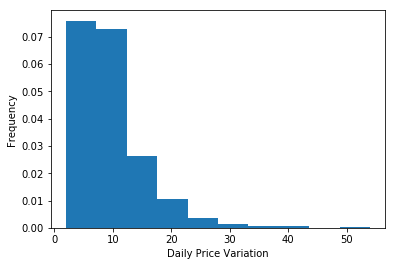

In [29]:
v1 = daily_shift['Daily Price Variation']
h=sorted([v1])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
pl.xlabel('Daily Price Variation')
pl.ylabel('Frequency')
pl.hist(h,normed=True)      #use this to draw histogram of your data
plt.savefig('daily-price-variation.png')
pl.show() 

## Calculate Monthly Price Variation

In [6]:
# find price max in a given month
google.groupby(pd.TimeGrouper(freq='M')).max().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-31,315.969910,319.223755,312.716095,315.428436,315.428436,13011400
2012-08-31,339.909210,342.268860,337.892334,341.782043,341.782043,7371000
2012-09-30,377.519592,379.973633,373.396423,375.805756,375.805756,12800800
2012-10-31,382.864838,384.687988,380.033264,381.543427,381.543427,25046500
2012-11-30,345.150116,347.350830,341.464111,346.928558,346.928558,6920900


In [7]:
# find price min in a given month
google.groupby(pd.TimeGrouper(freq='M')).min().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-31,281.727631,284.117096,279.228882,283.396790,283.396790,2394400
2012-08-31,310.733978,316.953522,309.690765,312.343506,312.343506,2154400
2012-09-30,337.802917,340.286774,334.573914,338.160583,338.160583,3036100
2012-10-31,333.833740,338.299683,332.686188,335.393585,335.393585,3093900
2012-11-30,320.907806,324.400085,315.945068,321.498962,321.498962,1856900


In [8]:
month_groupby = google.groupby(pd.TimeGrouper(freq='M'))
month_difference = (month_groupby['Open'].max() - month_groupby['Open'].min())
month_difference = pd.DataFrame(data = month_difference)
month_difference.columns = ['Monthly Price Variation']
month_difference.head()

,Monthly Price Variation
Date,
2012-07-31,34.242279
2012-08-31,29.175232
2012-09-30,39.716675
2012-10-31,49.031098
2012-11-30,24.242310


In [9]:
month_difference.std()

Monthly Price Variation    26.919452
dtype: float64

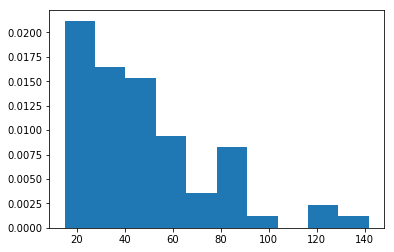

In [25]:
v1 = month_difference['Monthly Price Variation']
h=sorted([v1])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
pl.hist(h,normed=True)      #use this to draw histogram of your data
pl.show() 

In [10]:
year_groupby = google.groupby(pd.TimeGrouper(freq='A'))
year_difference = (year_groupby['Open'].max() - year_groupby['Open'].min())
year_difference = pd.DataFrame(data = year_difference)
year_difference.columns = ['Yearly Price Variation']
year_difference.head()

,Yearly Price Variation
Date,
2012-12-31,101.137207
2013-12-31,206.496918
2014-12-31,115.154052
2015-12-31,284.657166
2016-12-31,148.830017


In [11]:
year_difference.std()

Yearly Price Variation    87.277773
dtype: float64

## Plotting Price Variation by Day, Month, Year 

In [12]:
# making a Date Column
google = google.reset_index()
daily_shift = daily_shift.reset_index()
month_difference = month_difference.reset_index()
year_difference = year_difference.reset_index()
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-07-02,289.030151,289.616333,286.387329,288.359497,288.359497,3332400
1,2012-07-03,288.130981,292.303833,287.132477,292.015717,292.015717,2394400
2,2012-07-05,292.477722,298.091217,292.368439,296.034576,296.034576,4722100
3,2012-07-06,294.310791,294.842346,289.526917,291.096710,291.096710,4351600
4,2012-07-09,290.585022,292.398224,288.746979,291.111603,291.111603,3452500


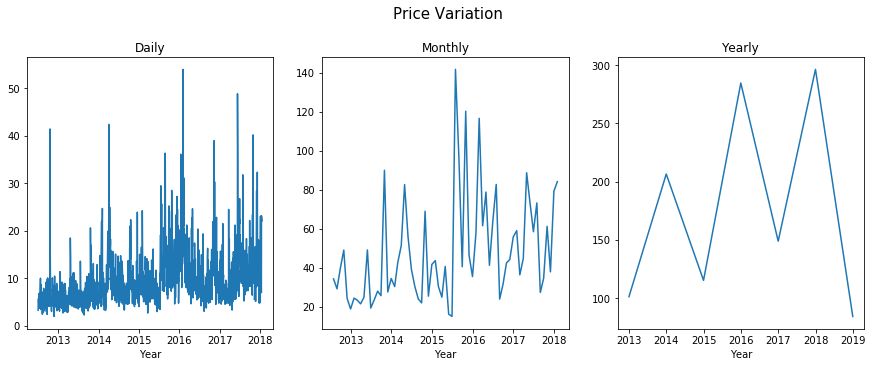

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5));
fig.suptitle('Price Variation', size = 15, x = .515, y=1.02)
axes[0].plot('Date', 'Daily Price Variation', data = daily_shift);
axes[0].set_title('Daily');
axes[0].set_xlabel('Year', fontsize=10);
axes[1].plot('Date', 'Monthly Price Variation', data = month_difference);
axes[1].set_title('Monthly');
axes[1].set_xlabel('Year', fontsize=10);
axes[2].plot('Date', 'Yearly Price Variation', data = year_difference);
axes[2].set_title('Yearly');
axes[2].set_xlabel('Year', fontsize=10);
plt.savefig('price-variation.png') 
plt.show()